In [3]:
import cv2

In [3]:
def show(image):
    cv2.imshow("___IMAGE___",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
##task 1
color_img = cv2.imread('image/colour_image.jpg')
cv2.imshow("colored_img", color_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray image", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
print("shape of colored image", color_img.shape)
print("shape of gray image", gray_img.shape)

shape of colored image (400, 450, 3)
shape of gray image (400, 450)


In [7]:
##task2
im1_ch1 = color_img[:,:,0]
im1_ch2 = color_img[:,:,1]
im1_ch3 = color_img[:,:,2]

In [8]:
show(im1_ch1)

In [9]:
show(im1_ch2)

In [10]:
show(im1_ch3)

In [3]:
##task3

import matplotlib.pyplot as plt

def matplot_show(img):
    img_inverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_inverted)

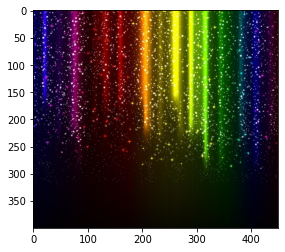

In [12]:
matplot_show(color_img)

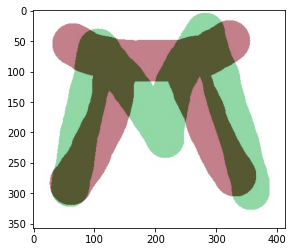

In [13]:
## task4

im1 = cv2.imread('image/pi_brown.jpg', cv2.IMREAD_COLOR)
im2 = cv2.imread('image/letter_M_green.jpg', cv2.IMREAD_COLOR)
im3 = cv2.addWeighted(im1,0.5,im2,0.5,0,5)

matplot_show(im3)

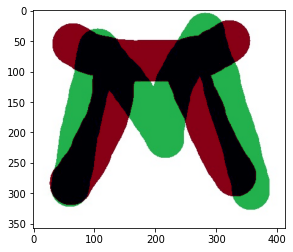

In [14]:
## task5

im_and = cv2.bitwise_and(im1,im2,mask=None)
matplot_show(im_and)

In [4]:
##task6
import numpy as np

im0 = cv2.imread('image/particles.jpg', cv2.IMREAD_COLOR)

def erode_img(x=3,y=5,iterations=1):
    im1 = cv2.erode(im0, np.ones((x,y),np.uint8), iterations=iterations)
    matplot_show(im1)

In [16]:
## practice

from ipywidgets import interactive

w = interactive(erode_img, x=(2,8,1), y=(2,8,1), iterations=(1,10,1))
w

interactive(children=(IntSlider(value=3, description='x', max=8, min=2), IntSlider(value=5, description='y', m…

In [17]:
##task7

def dilate_img(x=3,y=5,iterations=1):
    im1 = cv2.dilate(im0, np.ones((x,y),np.uint8), iterations=iterations)
    matplot_show(im1)   


w = interactive(dilate_img, x=(2,8,1), y=(2,8,1), iterations=(1,10,1))
w

interactive(children=(IntSlider(value=3, description='x', max=8, min=2), IntSlider(value=5, description='y', m…

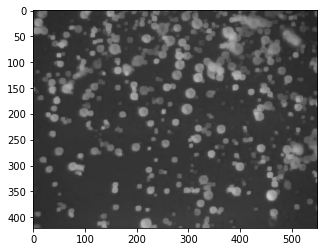

In [10]:
##task 8

kernel = np.ones((5,5), np.uint8)
gray_image = cv2.cvtColor(im0, cv2.COLOR_BGR2GRAY)

opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
matplot_show(opened_image)

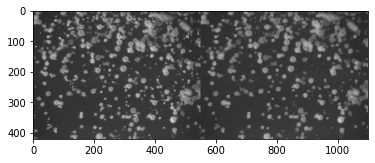

In [11]:
compare = np.hstack((gray_image, opened_image))
matplot_show(compare)

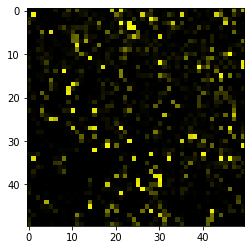

In [13]:
##task 9
empty_image = np.zeros((50, 50, 2), dtype=np.uint8)
bitwise_xor_image = cv2.bitwise_xor(gray_image, opened_image)

resized_xor_image = cv2.resize(bitwise_xor_image, (50, 50))
empty_image[:, :, 0] = resized_xor_image
empty_image[:, :, 1] = resized_xor_image 

new_image = cv2.cvtColor(cv2.merge([empty_image[:,:,0], empty_image[:,:,1], np.zeros((50, 50), dtype=np.uint8)]), cv2.COLOR_BGR2RGB)

matplot_show(new_image)

In [14]:
##task 10
morph_open_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
morph_gradient_image = cv2.morphologyEx(gray_image, cv2.MORPH_GRADIENT, kernel)

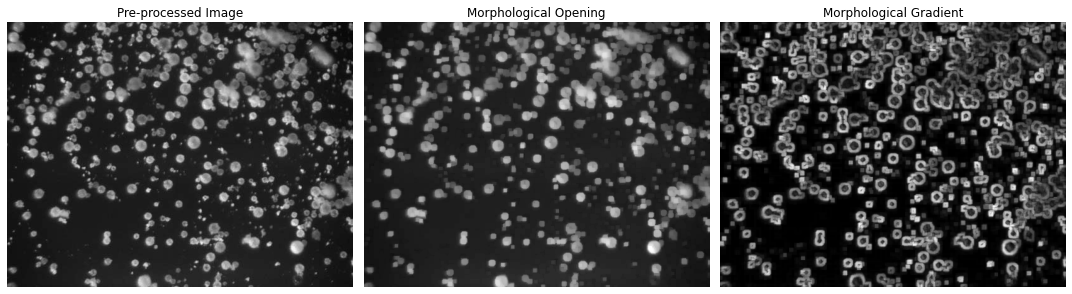

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Pre-processed Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(morph_open_image, cmap='gray')
plt.title('Morphological Opening')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(morph_gradient_image, cmap='gray')
plt.title('Morphological Gradient')
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

Total number of shrapnels detected: 128


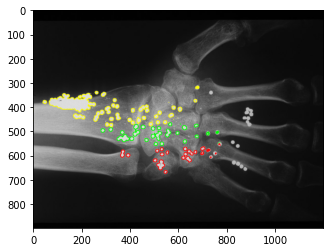

In [5]:
##task 12
import cv2
import numpy as np

image = cv2.imread('./image/shotgun_injury.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to detect bright spots (shrapnels)
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Find contours of the shrapnels
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

shrapnel_count = len(contours)

output = image.copy()


for i, contour in enumerate(contours):
    
    color = (0, 0, 255) if i < len(contours) // 3 else (0, 255, 0) if i < 2 * len(contours) // 3 else (0, 255, 255)
    
    cv2.drawContours(output, [contour], -1, color, 2)

cv2.imshow("Shrapnels Highlighted", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f"Total number of shrapnels detected: {shrapnel_count}")

matplot_show(output)

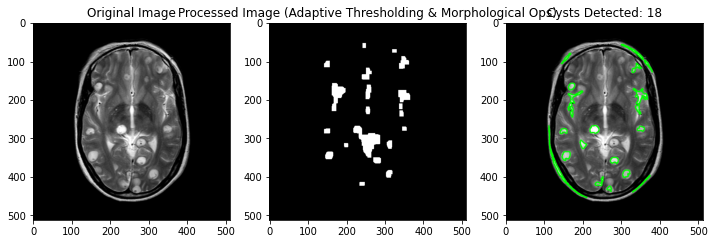

Approximate number of cysts: 18


In [95]:
##task13
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('./image/cysts.jpg')  

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

blurred = cv2.GaussianBlur(enhanced, (3, 3), 0)

_, binary_thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)


kernel = np.ones((5, 5), np.uint8)  
closing = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)

contours, _ = cv2.findContours(binary_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 50  # Minimum area for a contour to be considered a cyst
max_area = 1000  # Maximum area to avoid counting large non-cyst regions
filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if min_area < area < max_area:
        # Use aspect ratio to filter elongated shapes (since cysts are more circular/oval)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 1.5:  # Looser aspect ratio for oval shapes
            filtered_contours.append(cnt)
            
cyst_count = len(filtered_contours)

image_with_contours = image.copy()
cv2.drawContours(image_with_contours, filtered_contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Processed Image (Adaptive Thresholding & Morphological Ops)')

plt.subplot(1, 3, 3)
plt.imshow(image_with_contours)
plt.title(f'Cysts Detected: {cyst_count}')

plt.show()

print(f"Approximate number of cysts: {cyst_count}")



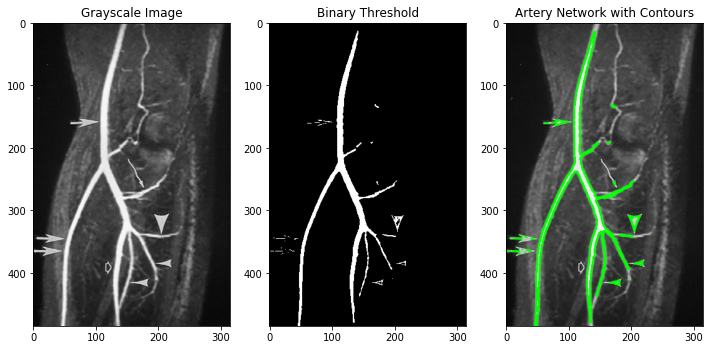

Total area of the artery network: 5455.5 pixels


In [86]:
#task 14
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('./image/angiogram.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (3, 3), 0)

_, binary_thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
morph_open = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
morph_close = cv2.morphologyEx(morph_open, cv2.MORPH_CLOSE, kernel, iterations=3)

contours, _ = cv2.findContours(binary_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total_area = 0
for contour in contours:
    total_area += cv2.contourArea(contour)

image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(binary_thresh, cmap='gray')
plt.title('Binary Threshold')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Artery Network with Contours')

plt.show()

print(f"Total area of the artery network: {total_area} pixels")
